<a href="https://colab.research.google.com/github/2303A52054/STATML-39/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from scipy import stats
data = {
    'latitude': [34.0, 34.1, 34.2, 34.3, 34.4],
    'total_rooms': [1000, 1500, 2000, 2500, 3000],
    'house_median_age': [10, 20, 30, 40, 50],
    'total_bedrooms': [3, 4, 3, 5, 4]}
housing = pd.DataFrame(data)
def calculate_mle(column):
  mean = column.mean()
  variance = column.var()
  return mean, variance
mle_results = {}
for column in ['latitude', 'total_rooms', 'house_median_age', 'total_bedrooms']:
  mle_results[column] = calculate_mle(housing[column])
for column, (mean, variance) in mle_results.items():
  print(f"{column}: Mean = {mean}, Variance = {variance}")

latitude: Mean = 34.2, Variance = 0.024999999999999648
total_rooms: Mean = 2000.0, Variance = 625000.0
house_median_age: Mean = 30.0, Variance = 250.0
total_bedrooms: Mean = 3.8, Variance = 0.7


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm
data = {
    'latitude': [34.0, 34.1, 34.2, 34.3, 34.4]
    }
housing = pd.DataFrame(data)
latitude_data = housing['latitude']
mu_mle = latitude_data.mean()
sigma_mle = latitude_data.std()
def log_likelihood(mu, sigma, data):
  return np.sum(norm.logpdf(data, loc=mu, scale=sigma))
log_likelihood_50 = log_likelihood(50, sigma_mle, latitude_data)
log_likelihood_75 = log_likelihood(75, sigma_mle, latitude_data)
log_likelihood_80 = log_likelihood(80, sigma_mle, latitude_data)
mle_log_likelihood = log_likelihood(mu_mle, sigma_mle, latitude_data)
print(f"Log-likelihood for mu=50: {log_likelihood_50}")
print(f"Log-likelihood for mu=75: {log_likelihood_75}")
print(f"Log-likelihood for mu=80: {log_likelihood_80}")
print(f"Maximum Likelihood Estimate (MLE) log-likelihood: {mle_log_likelihood}")

Log-likelihood for mu=50: -24961.372494031086
Log-likelihood for mu=75: -166461.37249403307
Log-likelihood for mu=80: -209761.37249403368
Maximum Likelihood Estimate (MLE) log-likelihood: 2.627505969261513


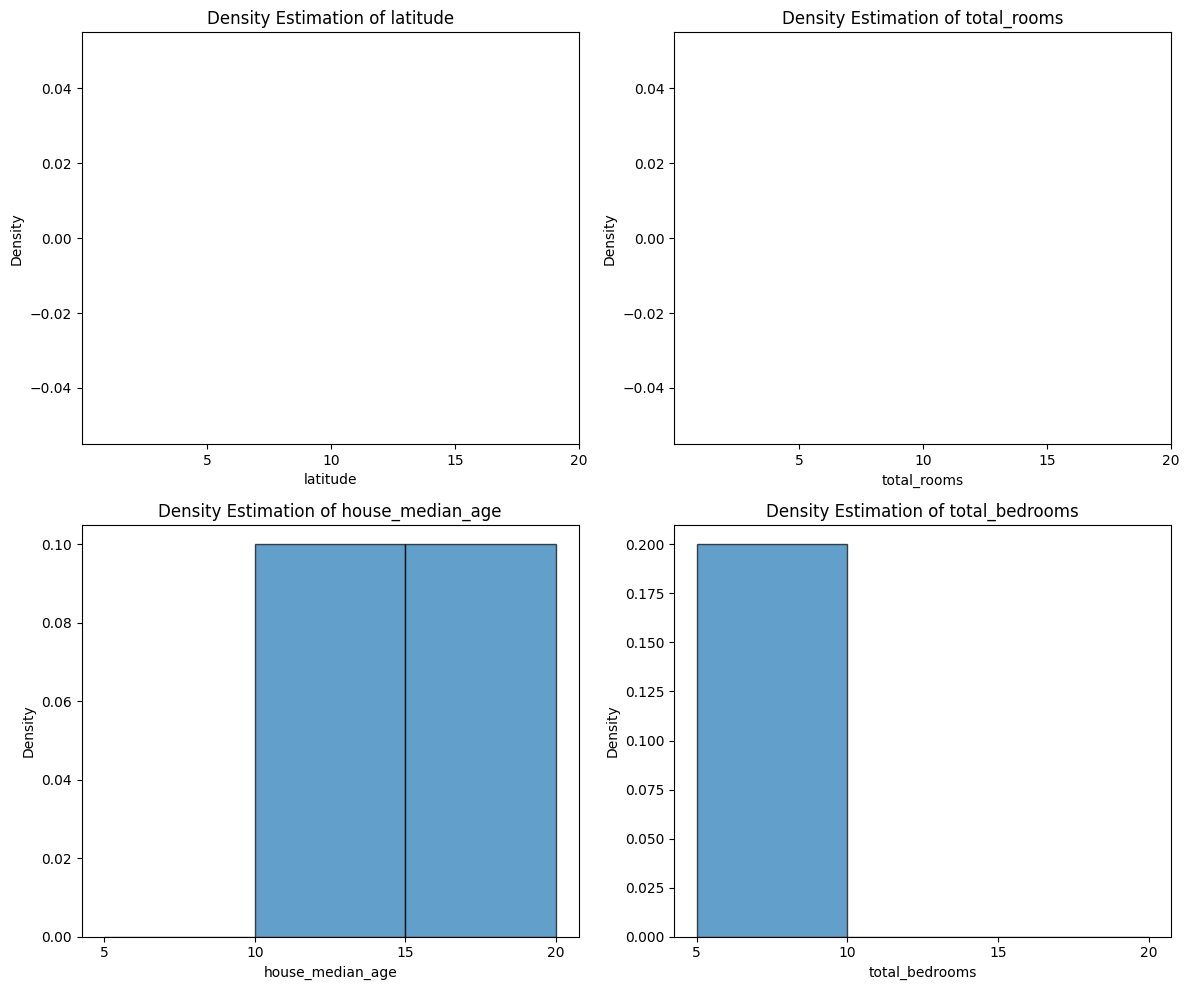

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    'latitude': [34.0, 34.1, 34.2, 34.3, 34.4],
    'total_rooms': [1000, 1500, 2000, 2500, 3000],
    'house_median_age': [10, 20, 30, 40, 50],
    'total_bedrooms': [3, 4, 3, 5, 4]}
housing = pd.DataFrame(data)
columns = ['latitude', 'total_rooms', 'house_median_age', 'total_bedrooms']
bins = [5, 10, 15, 20]
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns):
  plt.subplot(2, 2, i + 1)
  counts, bin_edges = np.histogram(housing[column], bins=bins, density=True)
  bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
  plt.bar(bin_centers, counts, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)
  plt.title(f'Density Estimation of {column}')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.xticks(bin_edges)
plt.tight_layout()
plt.show()